In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "D3.csv"
sample = df = pd.read_csv(file_path)

In [2]:
# Separate features and labels
X = sample.values[:, 0:3]  # get input values from first column -- X is a list here
y = sample.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X_0 = np.ones((m, 1))
X = np.hstack((X_0, X))

theta = np.zeros(4)
theta

X =  [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


array([0., 0., 0., 0.])

In [3]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [4]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [5]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [6]:
theta = np.zeros(4)
iterations = 1500
alpha = 0.1

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


In [7]:
# Final model
print('Final theta:', theta)

Final theta: [ 5.31416563 -2.00371905  0.53256359 -0.26560164]


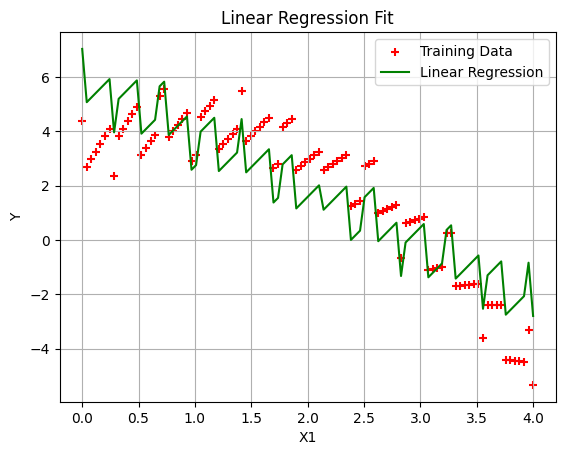

In [8]:
# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

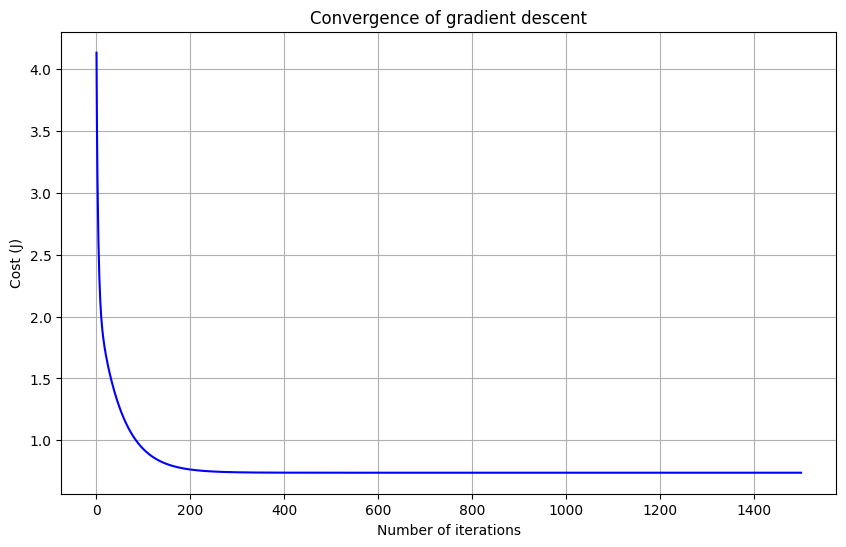

In [9]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [10]:
# Predict new values
newXValues = np.array([[1, 1, 1],
                       [2, 0, 4],
                       [3, 2, 1]])
newXValues = np.hstack((np.ones((newXValues.shape[0], 1)), newXValues))
newYValues = newXValues.dot(theta)
print('Y values for new X values =', newYValues)

Y values for new X values = [3.57740853 0.24432097 0.10253402]


In [11]:
# Gets linear model for X1, X2, and X3
print(f"Linear model: y = {theta[0]} + {theta[1]}*X1 + {theta[2]}*X2 + {theta[3]}*X3")

Linear model: y = 5.31416562749957 + -2.003719050517275*X1 + 0.5325635914250081*X2 + -0.2656016390618418*X3
